# Edge detection

### Experiment 1
1. Generate test image (Synthetic image)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

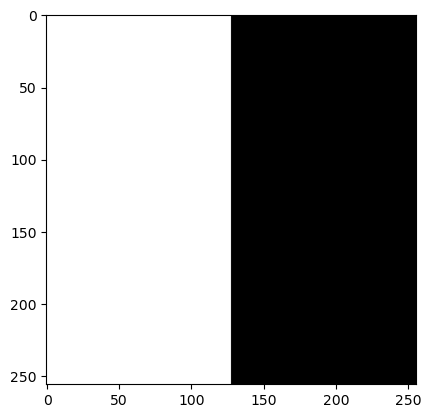

In [2]:
# 1. Generation of synthetic image
img = np.zeros((256, 256))
img[:,:128] = 255
plt.imshow(img, cmap="gray")

After the generation of the test image, we pass this thru 2 kernels `gx` (first order gradient along x) and `gy`(first order gradient along y) to get `Gx` and `Gy` respectively.

In [3]:
gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
# gx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
gy = gx.T

In [4]:
Gx, Gy = cv.filter2D(img, -1, gx), cv.filter2D(img, -1, gy)

In [5]:
G, A = np.sqrt(np.square(Gx) + np.square(Gy)), np.arctan2(Gy, Gx) * (180/np.pi)

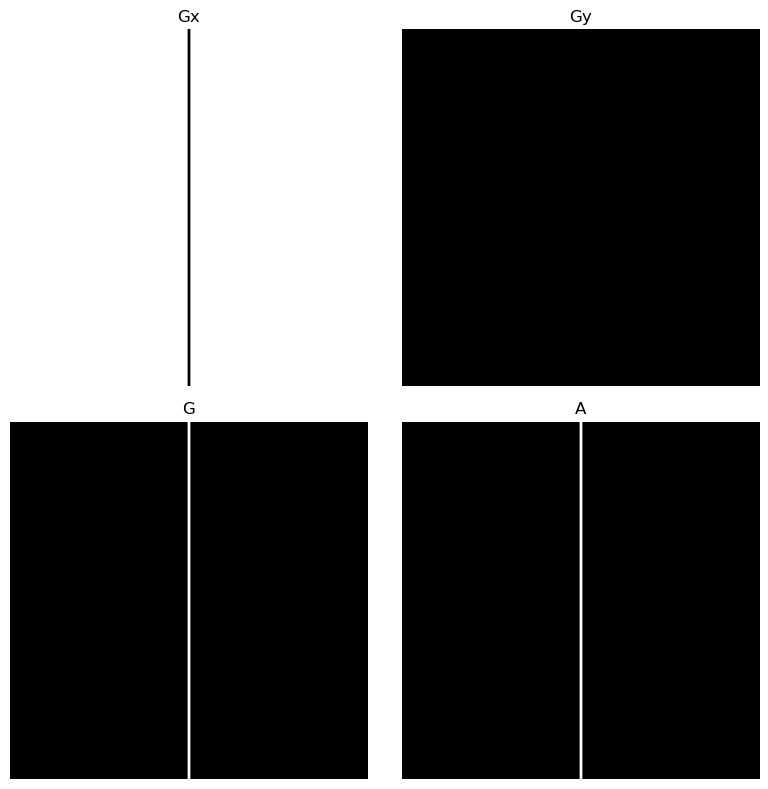

In [6]:
plt.figure(figsize=(8, 8))

plt.subplot(221), plt.imshow(Gx, cmap="gray"), plt.title("Gx"), plt.axis("off")
plt.subplot(222), plt.imshow(Gy, cmap="gray"), plt.title("Gy"), plt.axis("off")
plt.subplot(223), plt.imshow(G, cmap="gray"), plt.title("G"), plt.axis("off")
plt.subplot(224), plt.imshow(A, cmap="gray"), plt.title("A"), plt.axis("off")

plt.tight_layout()

Generation of a second synthetic test image.

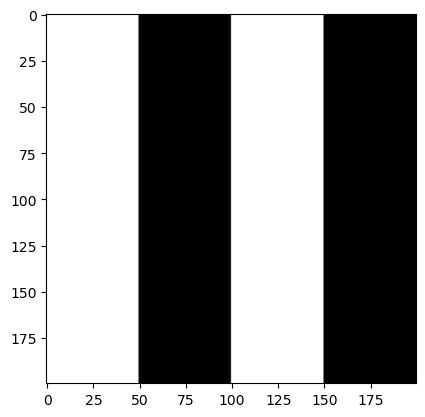

In [7]:
img = np.zeros((200, 200))
img[:, np.arange(0, 200, 100).reshape(-1, 1) + np.arange(50)] = 255    
plt.imshow(img, cmap="gray")

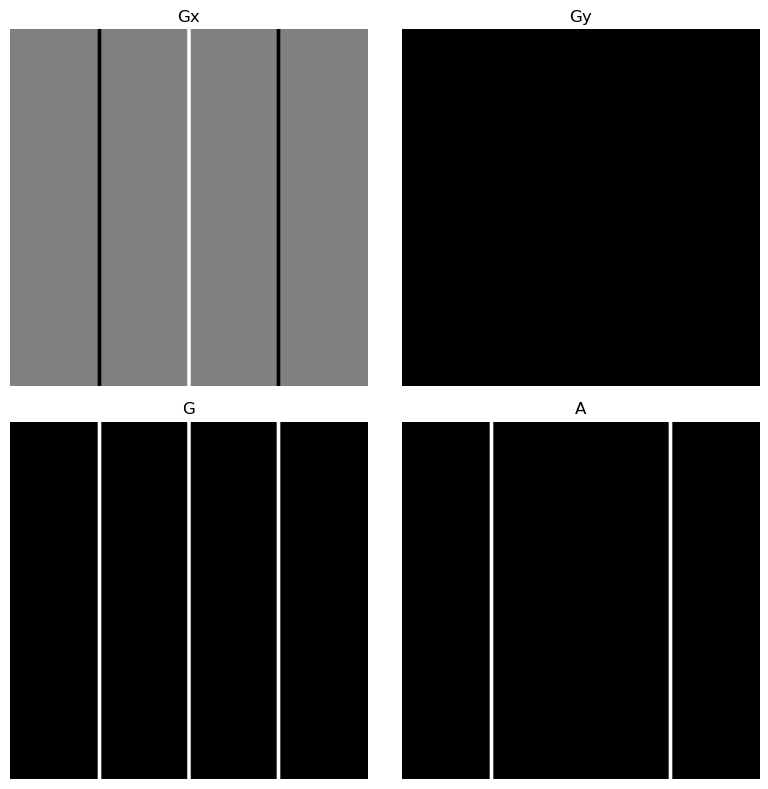

In [8]:
Gx, Gy = cv.filter2D(img, -1, gx), cv.filter2D(img, -1, gy)
G, A = np.sqrt(np.square(Gx) + np.square(Gy)), np.arctan2(Gy, Gx) * (180/np.pi)

plt.figure(figsize=(8, 8))
plt.subplot(221), plt.imshow(Gx, cmap="gray"), plt.title("Gx"), plt.axis("off")
plt.subplot(222), plt.imshow(Gy, cmap="gray"), plt.title("Gy"), plt.axis("off")
plt.subplot(223), plt.imshow(G, cmap="gray"), plt.title("G"), plt.axis("off")
plt.subplot(224), plt.imshow(A, cmap="gray"), plt.title("A"), plt.axis("off")
plt.tight_layout()

Where is this even useful?

1. Civil Engineering.
2. Railway track detection.

(<matplotlib.image.AxesImage at 0x2b26d4c8280>,
 Text(0.5, 1.0, 'img'),
 (-0.5, 793.5, 399.5, -0.5))

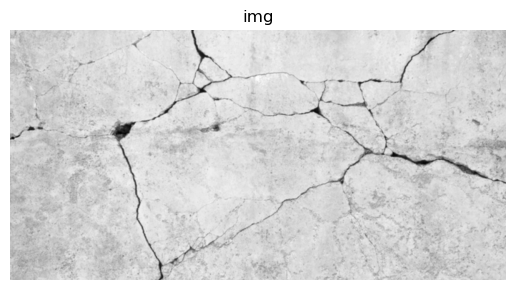

In [9]:
img = cv.imread("crack.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray"), plt.title("img"), plt.axis("off")

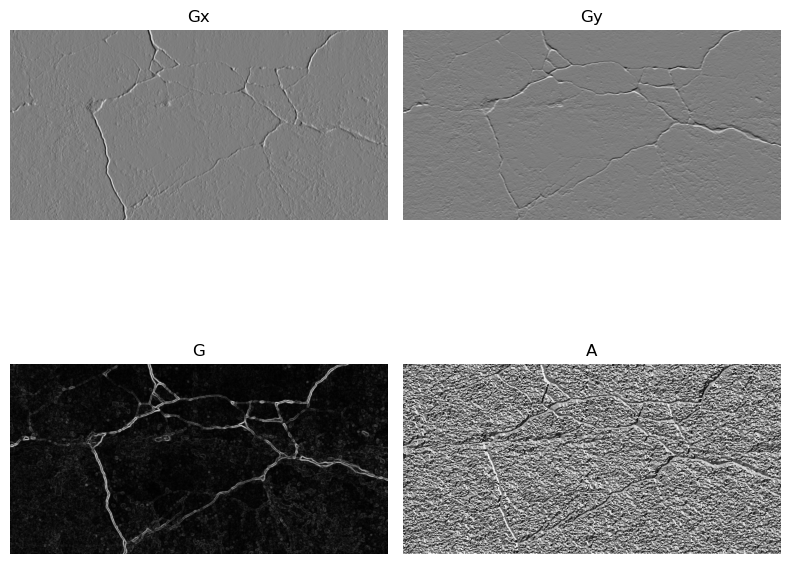

In [10]:
Gx, Gy = cv.filter2D(img, cv.CV_64F, gx), cv.filter2D(img, cv.CV_64F, gy)
G, A = np.sqrt(np.square(Gx) + np.square(Gy)), np.arctan2(Gy, Gx) * (180/np.pi)

plt.figure(figsize=(8, 8))
plt.subplot(221), plt.imshow(Gx, cmap="gray"), plt.title("Gx"), plt.axis("off")
plt.subplot(222), plt.imshow(Gy, cmap="gray"), plt.title("Gy"), plt.axis("off")
plt.subplot(223), plt.imshow(G, cmap="gray"), plt.title("G"), plt.axis("off")
plt.subplot(224), plt.imshow(A, cmap="gray"), plt.title("A"), plt.axis("off")
plt.tight_layout()

(<matplotlib.image.AxesImage at 0x2b26ed435b0>,
 Text(0.5, 1.0, 'img'),
 (-0.5, 1279.5, 719.5, -0.5))

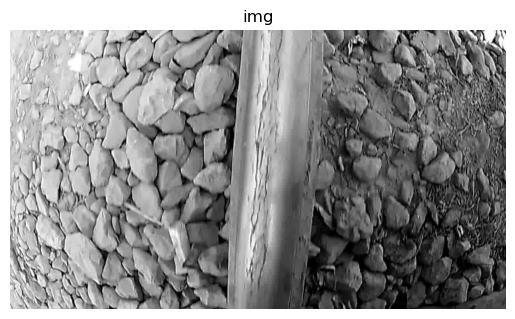

In [11]:
img = cv.imread("train_crack.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray"), plt.title("img"), plt.axis("off")

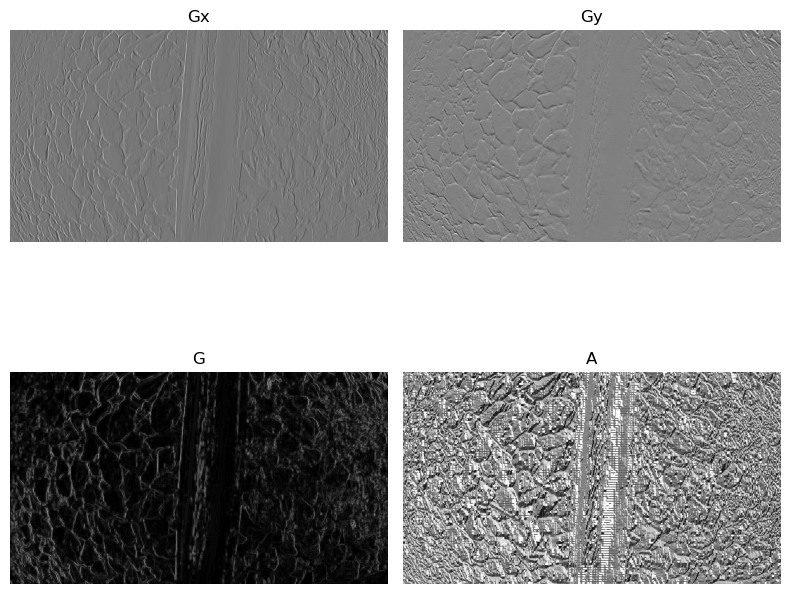

In [12]:
Gx, Gy = cv.filter2D(img, cv.CV_64F, gx), cv.filter2D(img, cv.CV_64F, gy)
G, A = np.sqrt(np.square(Gx) + np.square(Gy)), np.arctan2(Gy, Gx) * (180/np.pi)

plt.figure(figsize=(8, 8))
plt.subplot(221), plt.imshow(Gx, cmap="gray"), plt.title("Gx"), plt.axis("off")
plt.subplot(222), plt.imshow(Gy, cmap="gray"), plt.title("Gy"), plt.axis("off")
plt.subplot(223), plt.imshow(G, cmap="gray"), plt.title("G"), plt.axis("off")
plt.subplot(224), plt.imshow(A, cmap="gray"), plt.title("A"), plt.axis("off")
plt.tight_layout()

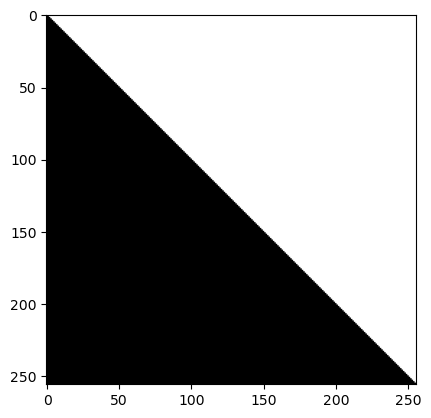

In [13]:
img = np.zeros((256, 256))
x, y = np.meshgrid(np.arange(256), np.arange(256))
img[x > y] = 255
plt.imshow(img, cmap="gray")

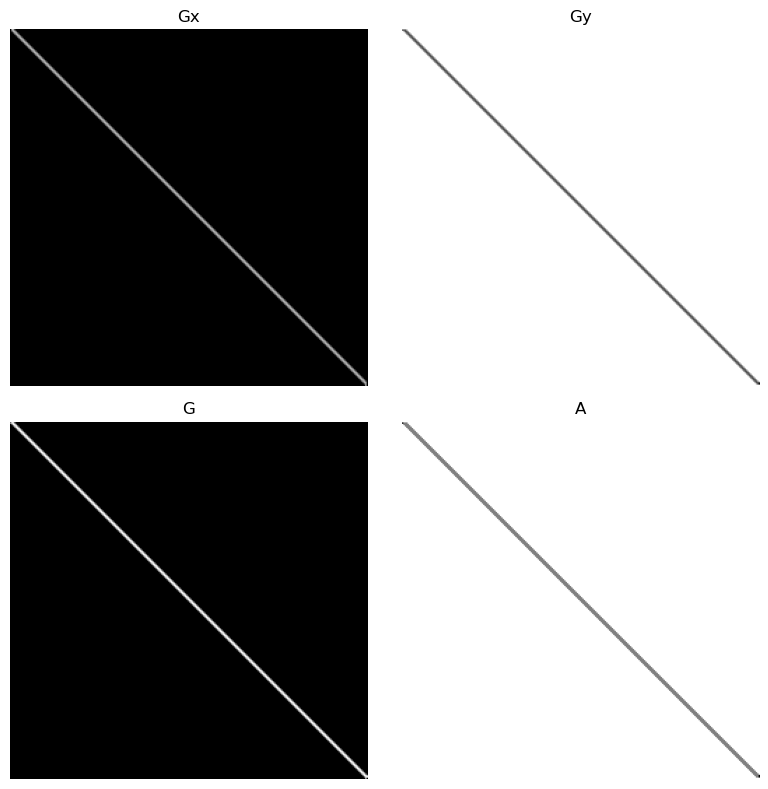

In [14]:
Gx, Gy = cv.filter2D(img, cv.CV_64F, gx), cv.filter2D(img, cv.CV_64F, gy)
G, A = np.sqrt(np.square(Gx) + np.square(Gy)), np.arctan2(Gy, Gx) * (180/np.pi)

plt.figure(figsize=(8, 8))
plt.subplot(221), plt.imshow(Gx, cmap="gray"), plt.title("Gx"), plt.axis("off")
plt.subplot(222), plt.imshow(Gy, cmap="gray"), plt.title("Gy"), plt.axis("off")
plt.subplot(223), plt.imshow(G, cmap="gray"), plt.title("G"), plt.axis("off")
plt.subplot(224), plt.imshow(A, cmap="gray"), plt.title("A"), plt.axis("off")
plt.tight_layout()

More info about
1. Sobel
2. Kirsh
3. Canny

operators

### Gaussian noise

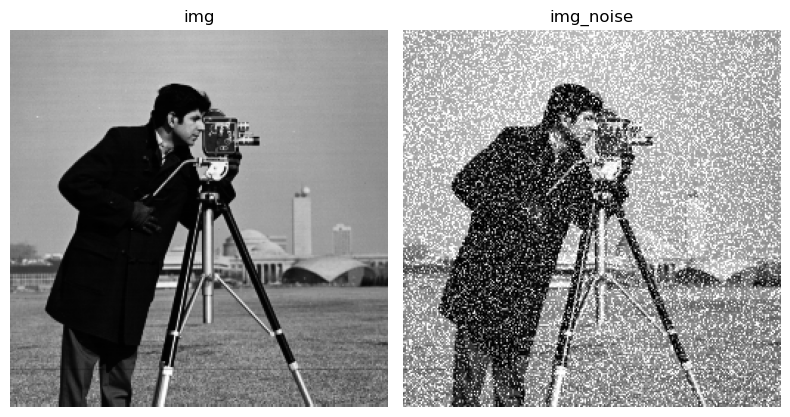

In [15]:
img = cv.imread("cameraman.tif", cv.IMREAD_GRAYSCALE)
M, N = img.shape

g_noise = cv.randn(np.zeros((M, N)).astype(np.uint8), 0, 100)
img_noise = cv.add(img, g_noise)

plt.figure(figsize=(8, 8))
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title("img"), plt.axis("off")
plt.subplot(122), plt.imshow(img_noise, cmap="gray"), plt.title("img_noise"), plt.axis("off")
plt.tight_layout()

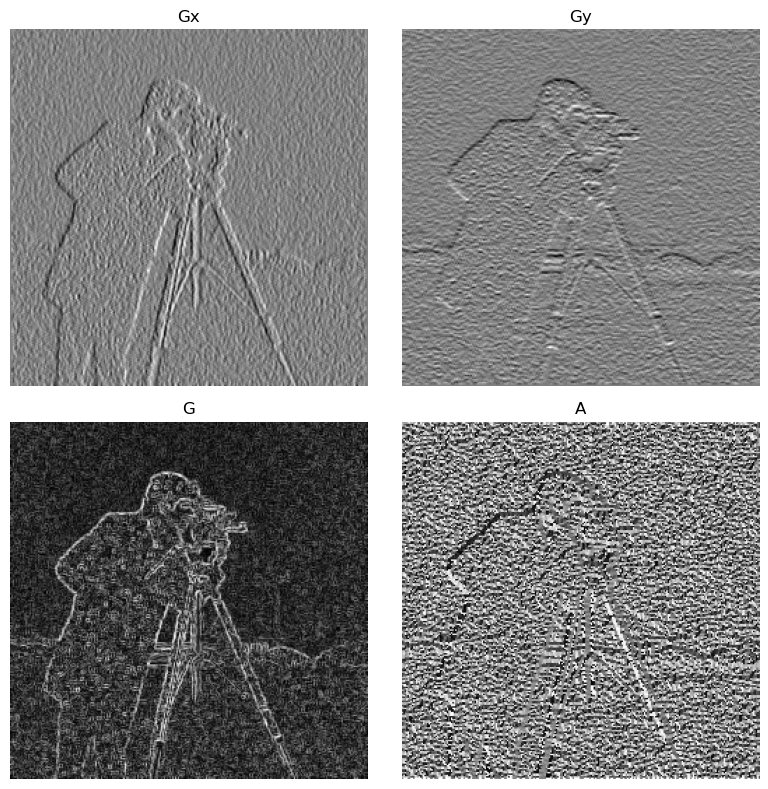

In [16]:
Gx, Gy = cv.filter2D(img_noise, cv.CV_64F, gx), cv.filter2D(img_noise, cv.CV_64F, gy)
G, A = np.sqrt(np.square(Gx) + np.square(Gy)), np.arctan2(Gy, Gx) * (180/np.pi)

plt.figure(figsize=(8, 8))
plt.subplot(221), plt.imshow(Gx, cmap="gray"), plt.title("Gx"), plt.axis("off")
plt.subplot(222), plt.imshow(Gy, cmap="gray"), plt.title("Gy"), plt.axis("off")
plt.subplot(223), plt.imshow(G, cmap="gray"), plt.title("G"), plt.axis("off")
plt.subplot(224), plt.imshow(A, cmap="gray"), plt.title("A"), plt.axis("off")
plt.tight_layout()

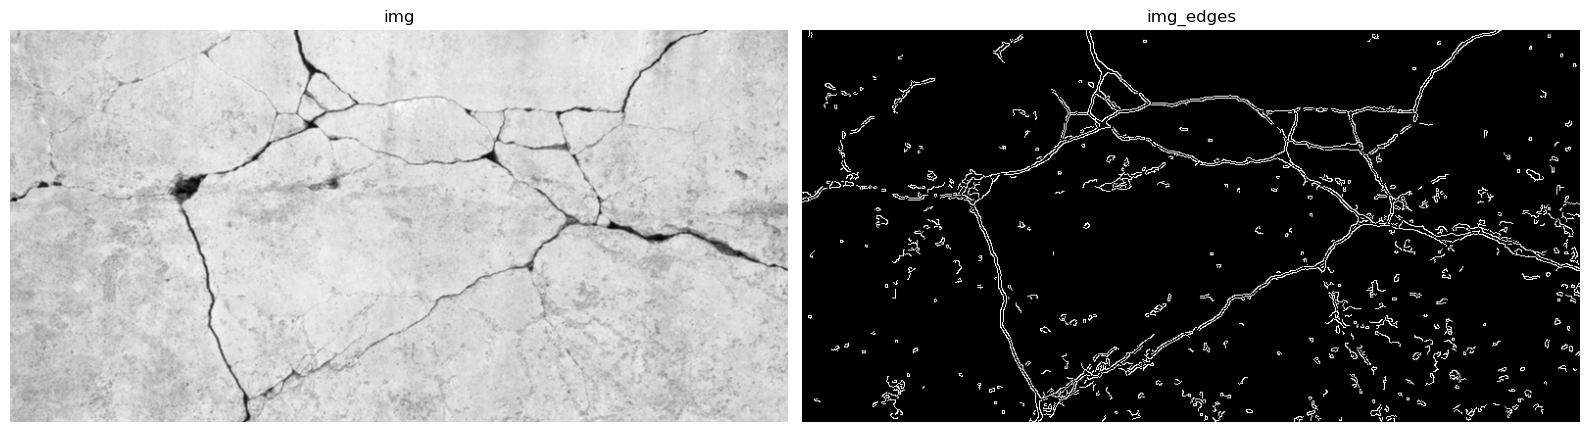

In [17]:
img = cv.imread("crack.jpg", cv.IMREAD_GRAYSCALE)
img_edges = cv.Canny(img, 100, 200) # decreasing the min_val will detect more noise

plt.figure(figsize=(16, 8))
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title("img"), plt.axis("off")
plt.subplot(122), plt.imshow(img_edges, cmap="gray"), plt.title("img_edges"), plt.axis("off")
plt.tight_layout()

### Thresholding

Grayscale img -> `Threshold/Logical Operator` -> Binary Image

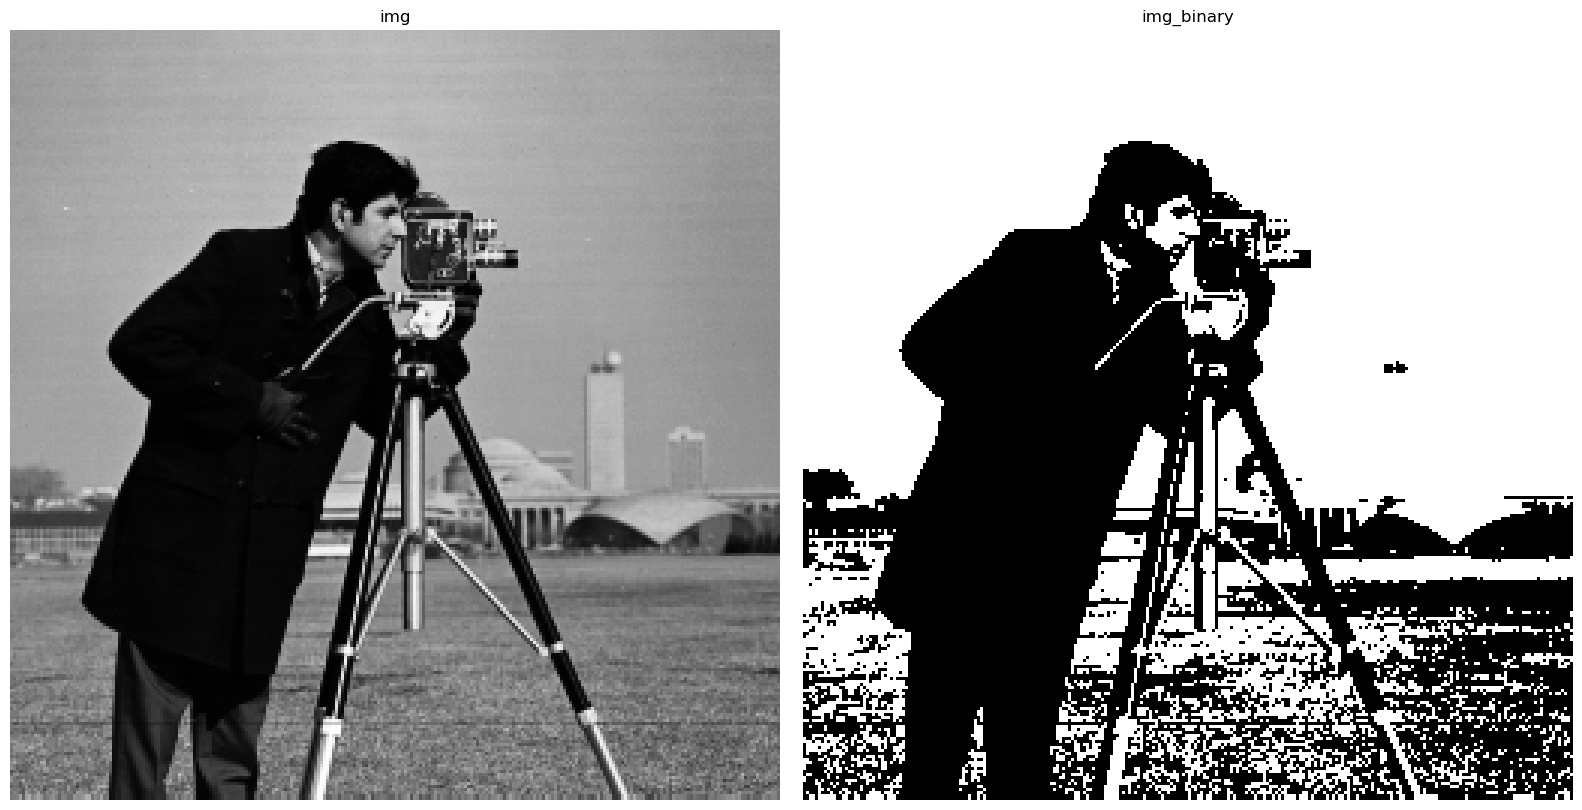

In [18]:
img = cv.imread("cameraman.tif", cv.IMREAD_GRAYSCALE)
img_binary = img > 128 # this choice of threshold? bad val here would be a problem. so we have different well-known thresholds.

plt.figure(figsize=(16, 8))
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title("img"), plt.axis("off")
plt.subplot(122), plt.imshow(img_binary, cmap="gray"), plt.title("img_binary"), plt.axis("off")
plt.tight_layout()